<a href="https://colab.research.google.com/github/jasonhckim/Linear_Regression_Project/blob/main/Linear_Regression_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
## Linear Regression Project

In [40]:
import pandas as pd
import numpy as np

import warnings 
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='white', color_codes=True)

In [41]:
## Data Acquisition (displaying bike dataset)

bike = pd.read_csv('/content/SeoulBikeData.csv')

In [42]:
# Printing Dimension of datasets
print("Dimension of the bike dataset", bike.shape)

Dimension of the bike dataset (8760, 14)


In [43]:
# Showing overview of the bike dataset
bike.head()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [44]:
# Extracting dataframe for only 'number' datatypes
df = bike.select_dtypes(include=['float64','int64'])
df.head()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0


In [45]:
# Showing datatypes of the columns
df.info()

## a column list of factors that influence the number of bikes rented

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Rented Bike Count         8760 non-null   int64  
 1   Hour                      8760 non-null   int64  
 2   Temperature(C)            8760 non-null   float64
 3   Humidity(%)               8760 non-null   int64  
 4   Wind speed (m/s)          8760 non-null   float64
 5   Visibility (10m)          8760 non-null   int64  
 6   Dew point temperature(C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)   8760 non-null   float64
 8   Rainfall(mm)              8760 non-null   float64
 9   Snowfall (cm)             8760 non-null   float64
dtypes: float64(6), int64(4)
memory usage: 684.5 KB


In [46]:
# getting descriptive statistics on "number" datatypes
df.describe()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [47]:
## Missing values
# Identifying missing values

miss_val = df.isna().sum()
miss_val

Rented Bike Count           0
Hour                        0
Temperature(C)              0
Humidity(%)                 0
Wind speed (m/s)            0
Visibility (10m)            0
Dew point temperature(C)    0
Solar Radiation (MJ/m2)     0
Rainfall(mm)                0
Snowfall (cm)               0
dtype: int64

In [48]:
# Identifying missing values > 0 and sorting them by ascending order
miss_val[miss_val>0].sort_values(ascending = False)

Series([], dtype: int64)

In [49]:
# Showing overview of the train dataset after inputting missing values 
df.head()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0


In [50]:
# Constructing correlation Matrix
df_bike = df[:8760]
data_corr = df_bike.corr()
data_corr

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
Rented Bike Count,1.000000,0.410257,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804
Hour,0.410257,1.000000,0.124114,-0.241644,0.285197,0.098753,0.003054,0.145131,0.008715,-0.021516
Temperature(C),0.538558,0.124114,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405
Humidity(%),-0.199780,-0.241644,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183
Wind speed (m/s),0.121108,0.285197,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554
Visibility (10m),0.199280,0.098753,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695
Dew point temperature(C),0.379788,0.003054,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887
Solar Radiation (MJ/m2),0.261837,0.145131,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301
Rainfall(mm),-0.123074,0.008715,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500
Snowfall (cm),-0.141804,-0.021516,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000


In [51]:
# Considering only the features which have absolute correlation value greater than 0.0

data_corr = data_corr['Rented Bike Count'][:-1]
data_corr[abs(data_corr)>=0.30].sort_values(ascending=False)

Rented Bike Count           1.000000
Temperature(C)              0.538558
Hour                        0.410257
Dew point temperature(C)    0.379788
Name: Rented Bike Count, dtype: float64

In [52]:
# df_test.drop(['Rented Bike Count'], axis = 1, inplace = True)
df_bike = df_bike[['Rented Bike Count','Temperature(C)','Hour','Dew point temperature(C)']]

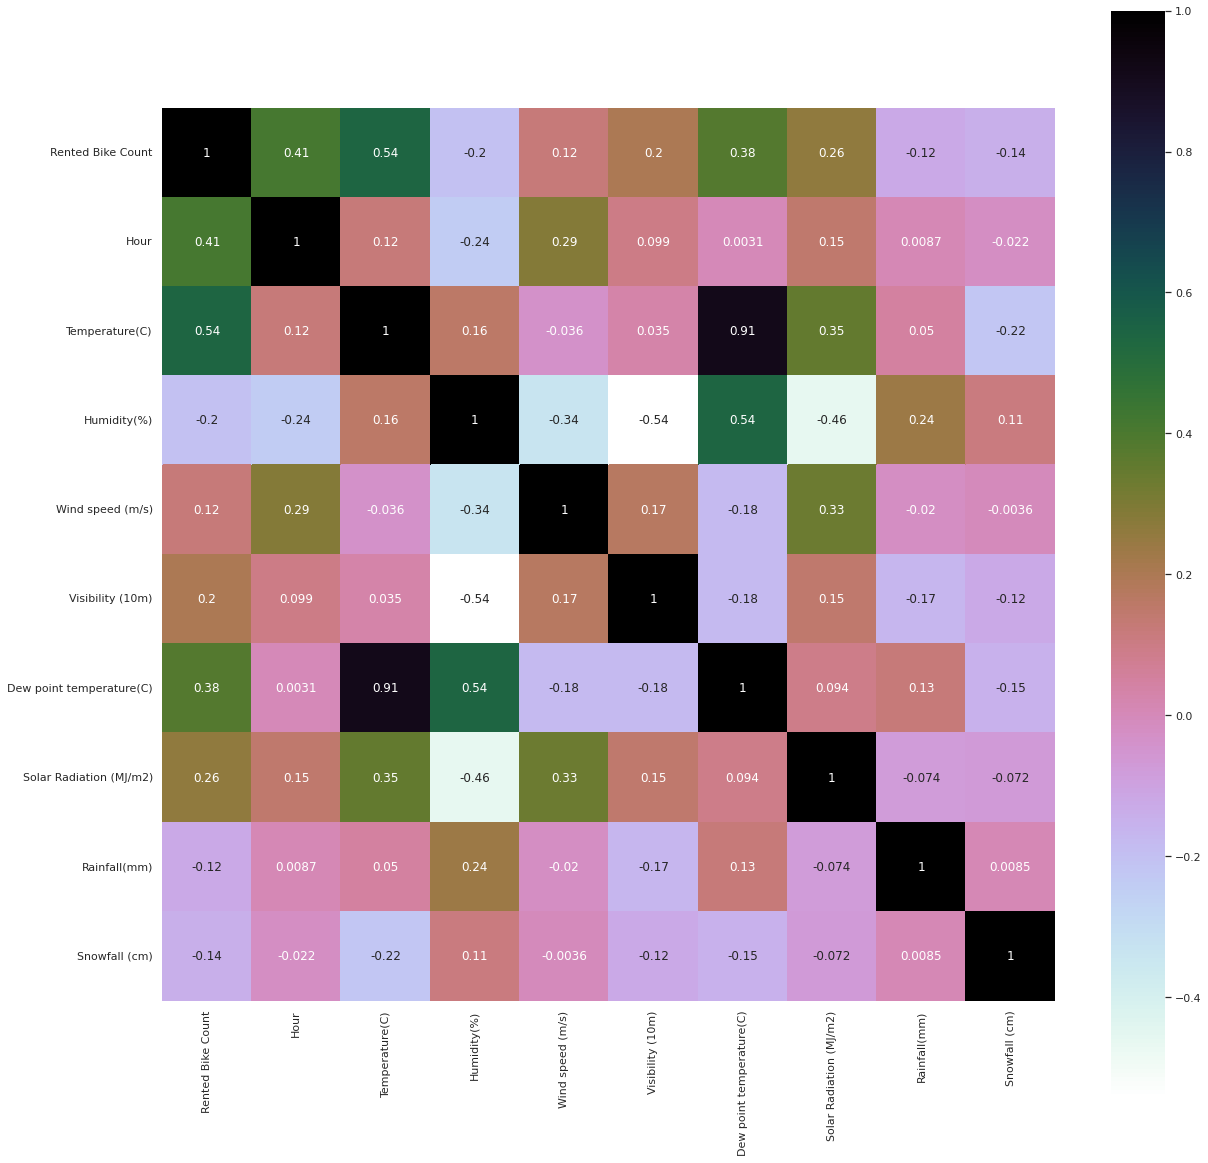

In [53]:
corr = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, cmap='cubehelix_r',square=True)
plt.show()

{'boxes': [<matplotlib.lines.Line2D at 0x7f319df25750>],
 'caps': [<matplotlib.lines.Line2D at 0x7f319df867d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f319df327d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f319df322d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f319df25e10>,
  <matplotlib.lines.Line2D at 0x7f319df86290>]}

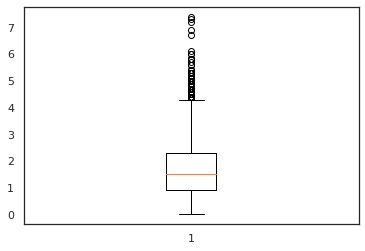

In [54]:
plt.boxplot(df['Wind speed (m/s)'])

In [55]:
Q1= np.percentile(df['Wind speed (m/s)'],25,interpolation='midpoint')
Q2= np.percentile(df['Wind speed (m/s)'],75,interpolation='midpoint')
IQR = Q2-Q1
low_limit=Q1-1.5*IQR
up_limit=Q2+1.5*IQR


In [56]:
df2=df

In [57]:
df2=df2[df2['Wind speed (m/s)']<up_limit]
df2=df2[df2['Wind speed (m/s)']>low_limit]

{'boxes': [<matplotlib.lines.Line2D at 0x7f319df12e10>],
 'caps': [<matplotlib.lines.Line2D at 0x7f319df1be10>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f319df20e50>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f319df20910>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f319df1b390>,
  <matplotlib.lines.Line2D at 0x7f319df1b8d0>]}

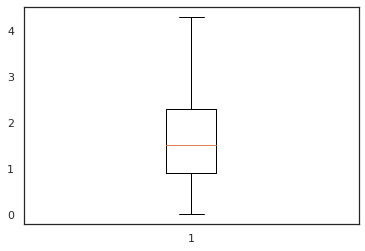

In [58]:
plt.boxplot(df2['Wind speed (m/s)'])

{'boxes': [<matplotlib.lines.Line2D at 0x7f319de7f150>],
 'caps': [<matplotlib.lines.Line2D at 0x7f319de86150>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f319de90190>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f319de86c10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f319de7f690>,
  <matplotlib.lines.Line2D at 0x7f319de7fbd0>]}

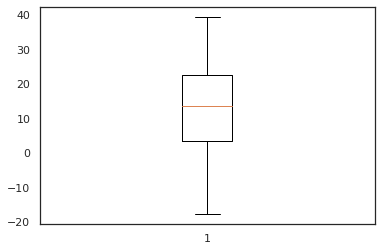

In [59]:
plt.boxplot(df['Temperature(C)'])

In [60]:
from sklearn.model_selection import train_test_split
bike, val = train_test_split(df_bike, test_size=0.30)

In [61]:
# considering only the highly correlated features
bike_x = bike.drop(['Rented Bike Count'], axis = 1)
bike_y = bike['Rented Bike Count'] # output of the training data

val_x = val.drop(['Rented Bike Count'], axis = 1)
val_y = val['Rented Bike Count']

In [62]:
print('Dimension of bike_x dataframe:', bike_x.shape)
print('Dimension of bike_y dataframe:', bike_y.shape)
print('Dimension of val_x dataframe:', val_x.shape)
print('Dimension of val_y dataframe:', val_y.shape)

Dimension of bike_x dataframe: (6132, 3)
Dimension of bike_y dataframe: (6132,)
Dimension of val_x dataframe: (2628, 3)
Dimension of val_y dataframe: (2628,)


In [63]:
from sklearn.linear_model import LinearRegression

ln_reg = LinearRegression()
ln_reg.fit(bike_x, bike_y)

LinearRegression()

In [64]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

df_pred = ln_reg.predict(val_x)
print('Mean Absolute Error of linear regression:', mean_absolute_error(df_pred, val_y))
print('Mean Square Error of linear regression:', mean_squared_error(df_pred, val_y))
print('R_Squared score of linear regression:', r2_score(val_y,df_pred))

Mean Absolute Error of linear regression: 353.2232185111643
Mean Square Error of linear regression: 231613.77812200086
R_Squared score of linear regression: 0.4466259998843497


In [65]:
df_pred

array([1042.9150095 , 1048.22533862,   87.96838033, ...,  190.31231159,
        339.28208288,  760.27243568])

We will try to get higher Accuracy Score by using different measurements

In [69]:
# Extracting dataframe for only 'number' datatypes
df4 = bike.select_dtypes(include=['float64','int64'])
df4.head()

,Rented Bike Count,Temperature(C),Hour,Dew point temperature(C)
684,363,4.3,12,-2.3
2439,694,15.3,15,-1.3
4671,2288,25.5,15,14.3
7310,1137,19.3,14,3.8
3426,63,16.1,18,11.2


In [80]:
df4_fill_val = df.groupby('Rented Bike Count')
df4_fill_val

In [71]:
X =df4
y = df4

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [73]:
from sklearn.preprocessing import StandardScaler
scl= StandardScaler()
X_train_std = scl.fit_transform(X_train)
X_test_std = scl.transform(X_test)

In [74]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators = 400, criterion='mse',random_state=1, n_jobs=-1)
forest.fit(X_train_std, y_train)
y_train_pred = forest.predict(X_train_std)
y_test_pred = forest.predict(X_test_std)

In [81]:
from sklearn.metrics import mean_squared_error, r2_score
#Root_Mean_Square_Log_Error(RMSE) is accuracy criteria for this problem
print('R2 train: %.3f' % r2_score(y_train, y_train_pred))
print('R2 test: %.3f' % r2_score(y_test, y_test_pred))
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test_pred, y_test))

R2 train: 0.990
R2 test: 0.928
1.7498580842391314
